<a href="https://colab.research.google.com/github/trungnguyen020/6351071072_LAB3/blob/main/6351071072_LAB3_Bai3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# --- CELL 1: KHAI BÁO THƯ VIỆN ---
print("Nguyễn Đức Trung - 6351071072")

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Các thư viện Keras/TensorFlow
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

print("Đã import xong thư viện!")

Nguyễn Đức Trung - 6351071072
Đã import xong thư viện!


In [2]:
# --- CELL 2: LOAD VÀ CHUẨN HÓA DỮ LIỆU ---
print("Nguyễn Đức Trung - 6351071072")

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

print(f"Kích thước tập Train tổng: {train_images.shape}")
print(f"Kích thước tập Test: {test_images.shape}")

Nguyễn Đức Trung - 6351071072
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Kích thước tập Train tổng: (60000, 28, 28)
Kích thước tập Test: (10000, 28, 28)


In [3]:
# --- CELL 3: CÂU D (Hàm tạo model) ---
print("Nguyễn Đức Trung - 6351071072")

def create_model():
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

print("Đã định nghĩa hàm create_model thành công.")

Nguyễn Đức Trung - 6351071072
Đã định nghĩa hàm create_model thành công.


In [4]:
# --- CELL 4: CÂU E (Huấn luyện K-Fold) ---
print("Nguyễn Đức Trung - 6351071072")

num_folds = 10
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

accuracy_per_fold = []
loss_per_fold = []
models = []

fold_no = 1

for train_index, val_index in kfold.split(train_images):
    X_train_fold = train_images[train_index]
    y_train_fold = train_labels[train_index]
    X_val_fold = train_images[val_index]
    y_val_fold = train_labels[val_index]
    model = create_model()
    print(f'Training fold {fold_no} ...')
    history = model.fit(X_train_fold, y_train_fold,
                        validation_data=(X_val_fold, y_val_fold),
                        epochs=5,
                        batch_size=32,
                        verbose=0)
    scores = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    loss_per_fold.append(scores[0])
    accuracy_per_fold.append(scores[1])
    models.append(model)
    print(f'Score for fold {fold_no}: Loss of {scores[0]:.4f}; Accuracy of {scores[1]*100:.2f}%')
    fold_no += 1

print("\nĐã hoàn thành huấn luyện 10 folds.")

Nguyễn Đức Trung - 6351071072


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training fold 1 ...
Score for fold 1: Loss of 0.0756; Accuracy of 97.75%
Training fold 2 ...
Score for fold 2: Loss of 0.0878; Accuracy of 97.48%
Training fold 3 ...
Score for fold 3: Loss of 0.0867; Accuracy of 97.52%
Training fold 4 ...
Score for fold 4: Loss of 0.0799; Accuracy of 97.78%
Training fold 5 ...
Score for fold 5: Loss of 0.0935; Accuracy of 97.18%
Training fold 6 ...
Score for fold 6: Loss of 0.0800; Accuracy of 97.43%
Training fold 7 ...
Score for fold 7: Loss of 0.0885; Accuracy of 97.25%
Training fold 8 ...
Score for fold 8: Loss of 0.0885; Accuracy of 97.40%
Training fold 9 ...
Score for fold 9: Loss of 0.0811; Accuracy of 97.45%
Training fold 10 ...
Score for fold 10: Loss of 0.0790; Accuracy of 97.55%

Đã hoàn thành huấn luyện 10 folds.


In [5]:
# --- CELL 5: CÂU F (Thống kê kết quả) ---
print("Nguyễn Đức Trung - 6351071072")

print('=== KẾT QUẢ TỔNG HỢP SAU 10 FOLDS ===')
print(f'Mean Accuracy: {np.mean(accuracy_per_fold)*100:.2f}% (+/- {np.std(accuracy_per_fold)*100:.2f}%)')
print(f'Mean Loss    : {np.mean(loss_per_fold):.4f}')
print(f'Std Loss     : {np.std(loss_per_fold):.4f}')

Nguyễn Đức Trung - 6351071072
=== KẾT QUẢ TỔNG HỢP SAU 10 FOLDS ===
Mean Accuracy: 97.48% (+/- 0.18%)
Mean Loss    : 0.0841
Std Loss     : 0.0054


Nguyễn Đức Trung - 6351071072


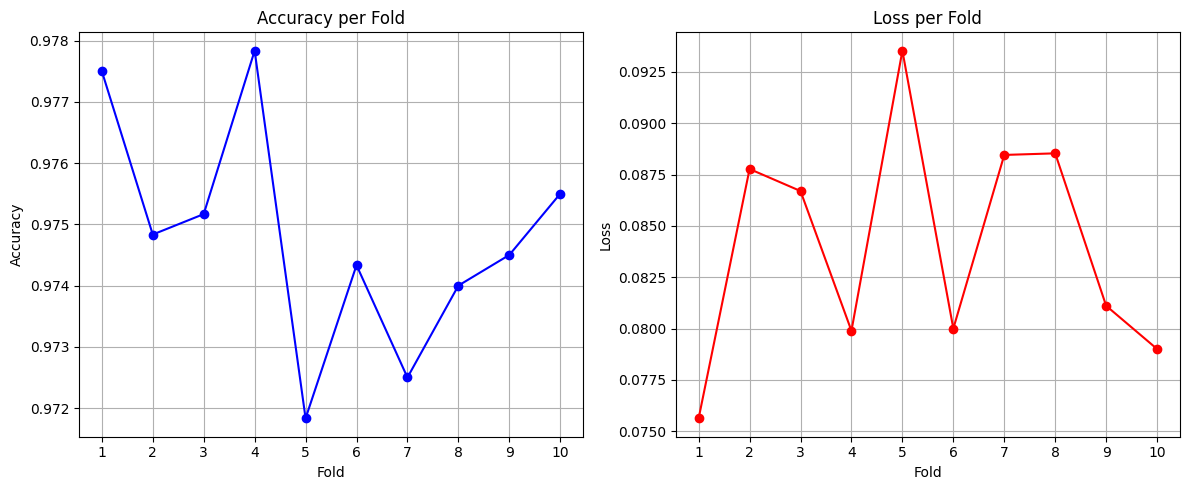

In [6]:
# --- CELL 6: CÂU G (Vẽ biểu đồ Fold) ---
print("Nguyễn Đức Trung - 6351071072")

folds = range(1, num_folds + 1)

plt.figure(figsize=(12, 5))

# Biểu đồ Accuracy
plt.subplot(1, 2, 1)
plt.plot(folds, accuracy_per_fold, marker='o', linestyle='-', color='blue')
plt.title('Accuracy per Fold')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.xticks(folds)
plt.grid(True)

# Biểu đồ Loss
plt.subplot(1, 2, 2)
plt.plot(folds, loss_per_fold, marker='o', linestyle='-', color='red')
plt.title('Loss per Fold')
plt.xlabel('Fold')
plt.ylabel('Loss')
plt.xticks(folds)
plt.grid(True)

plt.tight_layout()
plt.show()

In [7]:
# --- CELL 7: CÂU H (Chọn Best Model) ---
print("Nguyễn Đức Trung - 6351071072")
best_idx = np.argmax(accuracy_per_fold)
best_model = models[best_idx]

print(f"Model tốt nhất thuộc về Fold thứ: {best_idx + 1}")
print(f"Validation Accuracy của model này: {accuracy_per_fold[best_idx]*100:.2f}%")

Nguyễn Đức Trung - 6351071072
Model tốt nhất thuộc về Fold thứ: 4
Validation Accuracy của model này: 97.78%


In [8]:
# --- CELL 8: CÂU I (Test Accuracy) ---
print("Nguyễn Đức Trung - 6351071072")

test_scores = best_model.evaluate(test_images, test_labels, verbose=0)
print(f"Accuracy trên tập Test (sử dụng Best Model): {test_scores[1]*100:.2f}%")

Nguyễn Đức Trung - 6351071072
Accuracy trên tập Test (sử dụng Best Model): 97.61%


In [9]:
# --- CELL 9: CÂU J (Classification Report) ---
print("Nguyễn Đức Trung - 6351071072")

y_pred_prob = best_model.predict(test_images)
y_pred_classes = np.argmax(y_pred_prob, axis=1)

target_names = [str(i) for i in range(10)]
print("\nClassification Report trên tập Test:")
print(classification_report(test_labels, y_pred_classes, target_names=target_names))

Nguyễn Đức Trung - 6351071072
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Classification Report trên tập Test:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.98      0.95      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Nguyễn Đức Trung - 6351071072


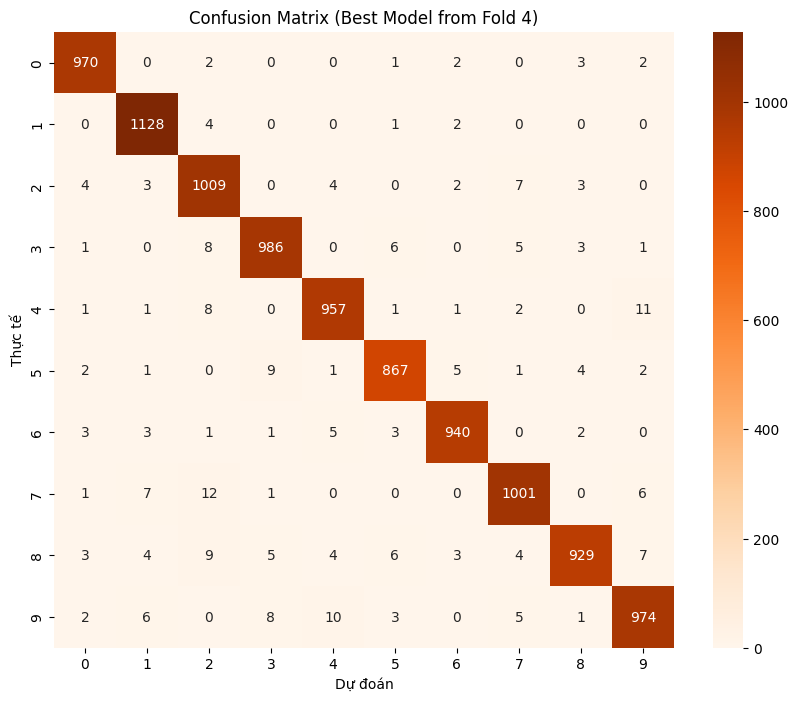

In [10]:
# --- CELL 10: CÂU K (Confusion Matrix Heatmap) ---
print("Nguyễn Đức Trung - 6351071072")

cm = confusion_matrix(test_labels, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=target_names,
            yticklabels=target_names)
plt.title(f'Confusion Matrix (Best Model from Fold {best_idx + 1})')
plt.ylabel('Thực tế')
plt.xlabel('Dự đoán')
plt.show()

Nguyễn Đức Trung - 6351071072
Kết quả phân lớp 5 ảnh đầu tiên trong tập Test:


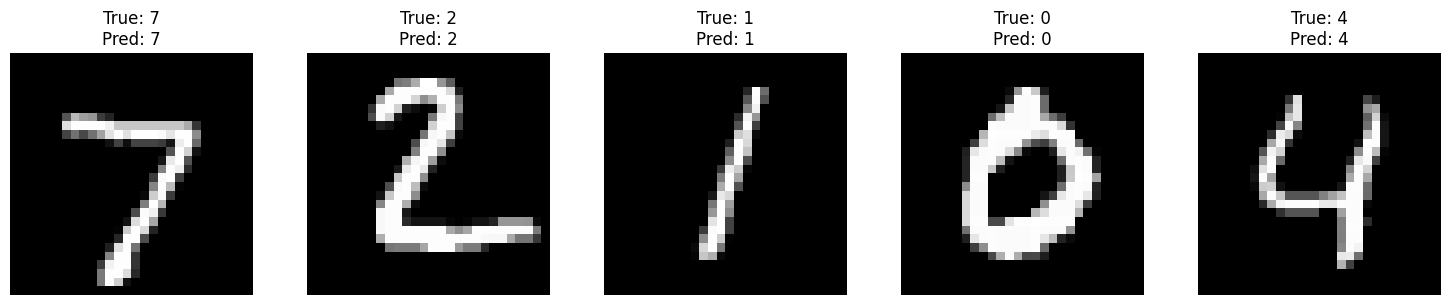

In [11]:
# --- CELL 11: CÂU L (Dự đoán 5 ảnh đầu tiên) ---
print("Nguyễn Đức Trung - 6351071072")

print("Kết quả phân lớp 5 ảnh đầu tiên trong tập Test:")
plt.figure(figsize=(15, 3))

for i in range(5):
    img = test_images[i]
    img_input = np.expand_dims(img, axis=0)
    pred_prob = best_model.predict(img_input, verbose=0)
    pred_label = np.argmax(pred_prob)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {test_labels[i]}\nPred: {pred_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()